In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
file_path = '/content/blood.csv'  # Ensure correct file path
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.\n")
except Exception as e:
    print("Error loading dataset:", e)
    exit()

Dataset loaded successfully.



In [3]:
# Display dataset information
print("\nFirst 5 Rows of Dataset:")
print(data.head())

print("\nDataset Summary:")
print(data.describe())

print("\nDataset Info:")
print(data.info())


First 5 Rows of Dataset:
   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0

Dataset Summary:
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entri

In [4]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())

# Dropping missing values (if any)
data.dropna(inplace=True)


Missing Values in Dataset:
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [5]:
# Define features (X) and target variable (y)
X = data.drop(['Class'], axis=1)  # Features
y = data['Class']  # Target variable

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with model training
model_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

In [6]:
# Model Evaluation
print("\nModel Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Confusion Matrix:
 [[99 14]
 [28  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150



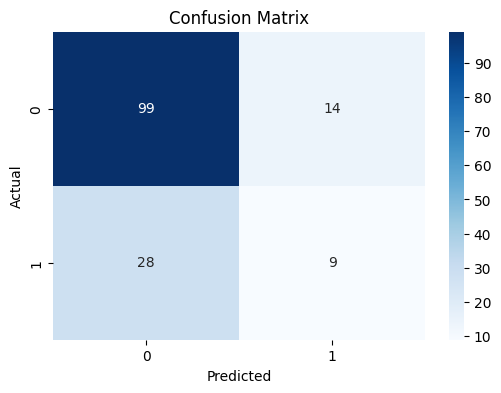

In [7]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<ipython-input-8-81167837cd58>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


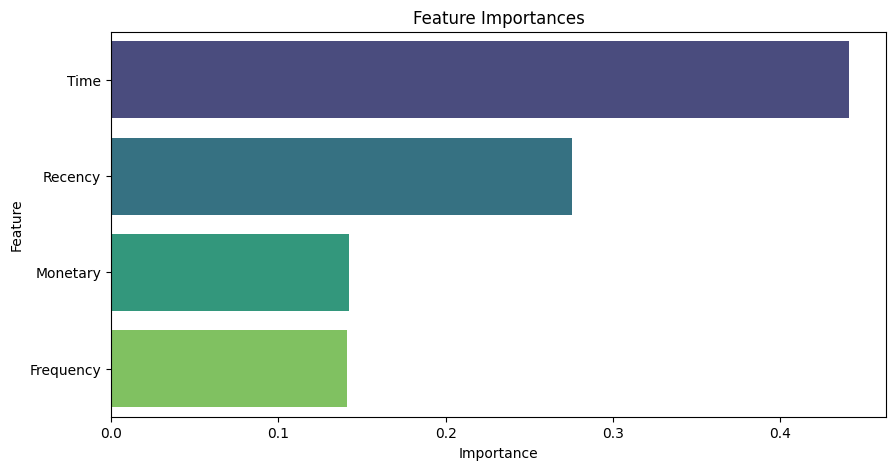

In [8]:
# Feature Importance Plot
feature_importances = model_pipeline.named_steps['classifier'].feature_importances_
feature_names = data.drop(['Class'], axis=1).columns.tolist()

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances")
plt.show()

In [15]:
# Function to generate healthcare recommendations
def generate_healthcare_recommendation(patient_data):
    """
    Predicts healthcare recommendations based on input patient data.

    Args:
    patient_data (dict): Dictionary containing patient feature values.

    Returns:
    str: Healthcare recommendation based on model prediction.
    """
    # Convert input data to a DataFrame
    patient_df = pd.DataFrame([patient_data])

    # Ensure the same feature scaling is applied
    patient_scaled = scaler.transform(patient_df)

    # Make prediction
    prediction = model_pipeline.predict(patient_scaled)[0]

     # Map predictions to healthcare recommendations
    recommendation_mapping = {
        0: 'No Immediate Attention Needed',
        1: 'Regular Health Check-ups Recommended',
        2: 'Lifestyle Modifications Suggested',
        3: 'Specialist Consultation Required',
        4: 'Critical Health Risk - Immediate Medical Attention Needed'
    }

    return recommendation_mapping.get(prediction, "Unknown Recommendation")

# Example patient data for healthcare recommendation
example_patient = {
    'Recency': 5,
    'Frequency': 50,
    'Monetary': 12500,
    'Time': 60
}


In [16]:
# Print personalized healthcare recommendation
print("\nPersonalized Healthcare Recommendation for Example Patient:")
print(generate_healthcare_recommendation(example_patient))


Personalized Healthcare Recommendation for Example Patient:
Regular Health Check-ups Recommended


In [17]:
print("\nHealthcare Recommendation Model Execution Completed!")



Healthcare Recommendation Model Execution Completed!
